In [1]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
import sklearn
import pandas as pd
import numpy as np

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


## Data Imputation:

TL;DR: Fill the missing data.

In [4]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
# Importing the SimpleImputer class
from sklearn.impute import SimpleImputer
import numpy as np

In [5]:
data = [[12, np.nan, 34], [10, 32, np.nan],
        [np.nan, 11, 20]]

# TODO: replace this data with our data.

In [50]:
data_raw_aws = pd.read_csv('./data/AWS.csv')
data_raw_gcp = pd.read_csv('./data/GCP.csv')
data_raw_azure = pd.read_csv('./data/Azure.csv')

data_og = pd.concat([data_raw_aws,data_raw_gcp,data_raw_azure])
data_raw = data_og.copy()
# Dropping Growth rate
# data_raw.drop('Growth rate(Regional)', inplace=True, axis=1)

In [52]:
data_raw

,Year,Growth rate(Regional),Popularity,Cloud Market cap,place,Vendor,Market cap,Market ratio,Growth Rate(Regional)
0,2016,NaN,37,0.96,India,AWS,NaN,31.0,NaN
1,2017,NaN,64,1.41,India,AWS,NaN,31.0,NaN
2,2018,NaN,54,1.79,India,AWS,NaN,32.3,NaN
3,2019,NaN,81,2.30,India,AWS,NaN,32.0,NaN
4,2020,NaN,60,2.83,India,AWS,NaN,31.0,NaN
...,...,...,...,...,...,...,...,...,...
109,2017,NaN,39,0.66,Norway,Azure,NaN,12.7,NaN
110,2018,NaN,48,0.90,Norway,Azure,NaN,16.5,NaN
111,2019,NaN,55,1.03,Norway,Azure,NaN,18.0,NaN
112,2020,NaN,61,1.21,Norway,Azure,NaN,20.0,NaN


In [53]:
data_raw = data_raw.drop(['Growth rate(Regional)', 'place', 'Vendor', 'Growth Rate(Regional)'], inplace=False,axis=1)

In [54]:
df_combined = data_raw[data_raw['Market cap'].notnull()]

In [55]:
df_na_combined = data_raw[data_raw['Market cap'].isna()]

# Display DATA

In [56]:
data_raw

,Year,Popularity,Cloud Market cap,Market cap,Market ratio
0,2016,37,0.96,NaN,31.0
1,2017,64,1.41,NaN,31.0
2,2018,54,1.79,NaN,32.3
3,2019,81,2.30,NaN,32.0
4,2020,60,2.83,NaN,31.0
...,...,...,...,...,...
109,2017,39,0.66,NaN,12.7
110,2018,48,0.90,NaN,16.5
111,2019,55,1.03,NaN,18.0
112,2020,61,1.21,NaN,20.0


In [57]:
df_combined

,Year,Popularity,Cloud Market cap,Market cap,Market ratio
10,2020,66,142.30,52.65100,31.0
11,2021,99,170.90,63.23300,33.0
14,2018,63,8.27,8.50000,32.3
17,2021,64,14.49,8.70000,33.0
23,2021,75,14.67,1.56000,33.0
29,2021,61,12.22,4.91660,33.0
38,2018,62,4.46,25.70000,32.3
39,2019,90,5.20,35.00000,32.0
46,2020,61,6.58,1.60000,31.0
2,2018,7,1.79,2.17003,9.5


In [58]:
df_na_combined

,Year,Popularity,Cloud Market cap,Market cap,Market ratio
0,2016,37,0.96,NaN,31.0
1,2017,64,1.41,NaN,31.0
2,2018,54,1.79,NaN,32.3
3,2019,81,2.30,NaN,32.0
4,2020,60,2.83,NaN,31.0
...,...,...,...,...,...
109,2017,39,0.66,NaN,12.7
110,2018,48,0.90,NaN,16.5
111,2019,55,1.03,NaN,18.0
112,2020,61,1.21,NaN,20.0


In [59]:
# df_na_aws = data_raw_aws[data_raw_aws['Market cap'].isna()]
# df_na_gcp = data_raw_gcp[data_raw_gcp['Market cap'].isna()]
# df_na_azure = data_raw_azure[data_raw_azure['Market cap'].isna()]

# pdList = [df_na_aws,df_na_gcp,df_na_azure]  # List of your dataframes
# df_na = pd.concat(pdList)

# df_na_combined = df_na.drop(['Growth rate(Regional)', 'place', 'Vendor', 'Growth Rate(Regional)'], inplace=False, axis=1)

In [60]:
columns_names = ['Year', 'Popularity', 'Cloud Market cap', 'Market cap', 'Market ratio']
swap = columns_names[-2]
columns_names[-2] = columns_names[-1]
columns_names[-1] = swap

columns_names

df_combined=df_combined.reindex(columns=columns_names)
df_na_combined=df_na_combined.reindex(columns=columns_names)
data_raw = data_raw.reindex(columns=columns_names)

In [61]:
df_na_combined

,Year,Popularity,Cloud Market cap,Market ratio,Market cap
0,2016,37,0.96,31.0,NaN
1,2017,64,1.41,31.0,NaN
2,2018,54,1.79,32.3,NaN
3,2019,81,2.30,32.0,NaN
4,2020,60,2.83,31.0,NaN
...,...,...,...,...,...
109,2017,39,0.66,12.7,NaN
110,2018,48,0.90,16.5,NaN
111,2019,55,1.03,18.0,NaN
112,2020,61,1.21,20.0,NaN


In [62]:
df_combined

,Year,Popularity,Cloud Market cap,Market ratio,Market cap
10,2020,66,142.30,31.0,52.65100
11,2021,99,170.90,33.0,63.23300
14,2018,63,8.27,32.3,8.50000
17,2021,64,14.49,33.0,8.70000
23,2021,75,14.67,33.0,1.56000
29,2021,61,12.22,33.0,4.91660
38,2018,62,4.46,32.3,25.70000
39,2019,90,5.20,32.0,35.00000
46,2020,61,6.58,31.0,1.60000
2,2018,7,1.79,9.5,2.17003


In [63]:
data_raw

,Year,Popularity,Cloud Market cap,Market ratio,Market cap
0,2016,37,0.96,31.0,NaN
1,2017,64,1.41,31.0,NaN
2,2018,54,1.79,32.3,NaN
3,2019,81,2.30,32.0,NaN
4,2020,60,2.83,31.0,NaN
...,...,...,...,...,...
109,2017,39,0.66,12.7,NaN
110,2018,48,0.90,16.5,NaN
111,2019,55,1.03,18.0,NaN
112,2020,61,1.21,20.0,NaN


In [64]:
df_na_combined.describe()


,Year,Popularity,Cloud Market cap,Market ratio,Market cap
count,320.000000,320.000000,320.000000,320.000000,0.0
mean,2018.431250,35.371875,6.711937,18.151250,NaN
std,1.711557,23.646346,18.175415,10.646035,NaN
min,2016.000000,2.000000,0.450000,3.300000,NaN
25%,2017.000000,14.000000,1.380000,9.000000,NaN
50%,2018.000000,33.000000,2.355000,16.500000,NaN
75%,2020.000000,54.000000,4.320000,31.000000,NaN
max,2021.000000,100.000000,142.300000,33.000000,NaN


In [65]:
# def exp(a):
#     if (type(a) == str):
        
#         number, milOrBil = a.split(' ')
#         print(number, milOrBil)
#         if (milOrBil == 'millions'):
#             print('its a cr')
#             return number
# #         return num
#         return number
        

# v = data_raw['Market cap'].map(exp)

# # data_raw['Market cap'] = v
# v

In [66]:
data_raw.columns

Index(['Year', 'Popularity', 'Cloud Market cap', 'Market ratio', 'Market cap'], dtype='object')

In [67]:
# plt.plot(data[:,0], data[:,2], label=r"Cloud Market cap", linestyle="dotted")
# plt.legend()
# plt.xlabel("$x$")
# plt.ylabel("$f(x)$")
# _ = plt.title("Gaussian process regression on noise-free dataset")

In [68]:
# plt.plot(data[:,0], data[:,3], label=r"Cloud Market Cap", linestyle="dotted")
# plt.legend()
# plt.xlabel("$x$")
# plt.ylabel("$f(x)$")
# _ = plt.title("Gaussian process regression on noise-free dataset")

## Regression:

Mapping all the features to regional market cap.

In [69]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import matplotlib.pyplot as plt
import re

In [70]:
type('sfsf')

str

In [71]:
train_data.shape

(22, 5)

In [72]:
train_data = np.array(df_combined)
test_data = np.array(data_raw)

test_data.shape

(342, 5)

In [73]:
X_train = train_data[:, 0:4]
Y_train = train_data[:,4]
X_train

array([[2.020e+03, 6.600e+01, 1.423e+02, 3.100e+01],
       [2.021e+03, 9.900e+01, 1.709e+02, 3.300e+01],
       [2.018e+03, 6.300e+01, 8.270e+00, 3.230e+01],
       [2.021e+03, 6.400e+01, 1.449e+01, 3.300e+01],
       [2.021e+03, 7.500e+01, 1.467e+01, 3.300e+01],
       [2.021e+03, 6.100e+01, 1.222e+01, 3.300e+01],
       [2.018e+03, 6.200e+01, 4.460e+00, 3.230e+01],
       [2.019e+03, 9.000e+01, 5.200e+00, 3.200e+01],
       [2.020e+03, 6.100e+01, 6.580e+00, 3.100e+01],
       [2.018e+03, 7.000e+00, 1.790e+00, 9.500e+00],
       [2.019e+03, 1.000e+01, 2.300e+00, 6.000e+00],
       [2.021e+03, 9.000e+00, 1.709e+02, 9.000e+00],
       [2.021e+03, 2.000e+00, 1.222e+01, 9.000e+00],
       [2.018e+03, 7.000e+00, 4.460e+00, 9.500e+00],
       [2.019e+03, 1.600e+01, 5.200e+00, 6.000e+00],
       [2.020e+03, 4.800e+01, 1.423e+02, 2.000e+01],
       [2.021e+03, 6.000e+01, 1.709e+02, 2.200e+01],
       [2.017e+03, 4.700e+01, 6.370e+00, 1.270e+01],
       [2.018e+03, 5.800e+01, 8.270e+00, 1.650

In [74]:
X_test = test_data[:,0:4]
Y_test = test_data[:,4]

X_test = np.expand_dims(X_test,1).squeeze()
Y_test = np.expand_dims(Y_test,1).squeeze()

X_test

array([[2.016e+03, 3.700e+01, 9.600e-01, 3.100e+01],
       [2.017e+03, 6.400e+01, 1.410e+00, 3.100e+01],
       [2.018e+03, 5.400e+01, 1.790e+00, 3.230e+01],
       ...,
       [2.019e+03, 5.500e+01, 1.030e+00, 1.800e+01],
       [2.020e+03, 6.100e+01, 1.210e+00, 2.000e+01],
       [2.021e+03, 7.400e+01, 1.700e+00, 2.200e+01]])

In [75]:

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, Y_train)
gaussian_process.kernel_

28**2 * RBF(length_scale=7.88)

In [76]:
mean_prediction, std_prediction = gaussian_process.predict(X_test, return_std=True)

mean_prediction.shape, std_prediction

((342,),
 array([2.79308894e+01, 9.98456995e+00, 2.06799515e+01, 2.38110569e+01,
        5.80938417e+00, 9.39249826e+00, 2.79728892e+01, 2.79728892e+01,
        2.79728892e+01, 2.79728882e+01, 9.99653592e-06, 1.00079021e-05,
        2.76102382e+01, 2.04815740e+01, 9.99653592e-06, 7.30662567e+00,
        1.54786696e+01, 9.99653592e-06, 2.79056677e+01, 1.28516554e+01,
        2.08144508e+00, 1.53198563e+00, 1.97519898e+01, 1.00022206e-05,
        2.77510210e+01, 2.78000684e+01, 2.65410571e+01, 2.76616375e+00,
        2.65923891e+01, 1.00022206e-05, 2.31403505e+01, 6.98721385e+00,
        1.47145402e+01, 2.28476421e+01, 2.63606434e+01, 2.20821634e+01,
        2.77582693e+01, 2.61897152e+01, 1.00079021e-05, 1.00135803e-05,
        1.33128466e+01, 1.97239356e+01, 2.79239497e+01, 2.71332154e+01,
        1.55902716e+01, 2.19729936e+01, 1.00022206e-05, 1.74208338e+01,
        2.79168275e+01, 2.78308347e+01, 2.76365373e+01, 1.55147577e+01,
        2.76704994e+01, 7.48877578e+00, 2.77850865e+01,

,Year,Growth rate(Regional),Popularity,Cloud Market cap,place,Vendor,Market cap,Market ratio,Growth Rate(Regional)
0,2016,NaN,37,0.96,India,AWS,NaN,31.0,NaN
1,2017,NaN,64,1.41,India,AWS,NaN,31.0,NaN
2,2018,NaN,54,1.79,India,AWS,NaN,32.3,NaN
3,2019,NaN,81,2.30,India,AWS,NaN,32.0,NaN
4,2020,NaN,60,2.83,India,AWS,NaN,31.0,NaN
...,...,...,...,...,...,...,...,...,...
109,2017,NaN,39,0.66,Norway,Azure,NaN,12.7,NaN
110,2018,NaN,48,0.90,Norway,Azure,NaN,16.5,NaN
111,2019,NaN,55,1.03,Norway,Azure,NaN,18.0,NaN
112,2020,NaN,61,1.21,Norway,Azure,NaN,20.0,NaN


### Plotting the Results

In [79]:
place = list(data_og['place'])
vendor = list(data_og['Vendor'])
# vendor = list(df_na['Vendor'])

place

['India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'United kingdom',
 'United kingdom',
 'United kingdom',
 'United kingdom',
 'United kingdom',
 'United kingdom',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Switzerland',
 'Switzerland',
 'Switzerland',
 'Switzerland',
 'Switzerland',
 'Switzerland',
 'South Korea',
 'South Korea',
 'South Korea',
 'South Korea',
 'South Korea',
 'South Korea',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Sweden',
 'Sweden',


In [80]:
pred_market_cap_for_na = pd.DataFrame(mean_prediction, columns=['Market cap'])
place_df = pd.DataFrame(place, columns=['place'])
vendor_df = pd.DataFrame(vendor, columns=['vendor'])

test_data = pd.DataFrame(X_test, columns=['Year', 'Popularity', 'Cloud Market cap', 'Market ratio'])

test_data
test_data_df = pd.concat([test_data,place_df,vendor_df,pred_market_cap_for_na],axis=1)


In [81]:
test_data_df[test_data_df['Year'] == 2018][ test_data_df['place'] == 'India']

/tmp/ipykernel_16559/2468953185.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_data_df[test_data_df['Year'] == 2018][ test_data_df['place'] == 'India']


,Year,Popularity,Cloud Market cap,Market ratio,place,vendor,Market cap
2,2018.0,54.0,1.79,32.3,India,AWS,17.662230
116,2018.0,7.0,1.79,9.5,India,GCP,2.170030
230,2018.0,27.0,1.79,16.5,India,Azure,0.908786


In [82]:
test_data_df[test_data_df['Year'] == 2017][ test_data_df['place'] == 'India']

supported_places = test_data_df['place'].unique()
supported_years = test_data_df['Year'].unique()
supported_vendors = test_data_df['vendor'].unique()

/tmp/ipykernel_16559/1504267131.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_data_df[test_data_df['Year'] == 2017][ test_data_df['place'] == 'India']


In [93]:
import json
  
# Data to be written
dicty ={
    "timeBins": [
        
    ],
    
}

timeBins = [2016,2017,2018,2019,2020,2021]

def create_bin_data(value,place,vendor):
    return {
        "i": place,
        "e": place,
        "wc": vendor,
        "v": value
    }
    

for year in timeBins:
    curr_df = test_data_df[test_data_df['Year'] == year]
    curr_year_data = []
    for curr_place in supported_places:
#         print(curr_place)
        for curr_year in supported_years:
#             print(curr_year)
            market_cap_for_all_vendors = []
            curr_place_data = test_data_df[test_data_df['Year'] == curr_year][ test_data_df['place'] == curr_place]['Market cap']
            curr_place_data = np.array(curr_place_data).tolist()
#             print(curr_place_data)
            curr_data = {"i": curr_place, "e": curr_place, "wc": 'aws', "v": curr_place_data[0], "mcap": curr_place_data}
            curr_year_data.append(curr_data)
    print(curr_year_data)
#     for i,row in curr_df.iterrows():
#         curr_place = row['place']
#         curr_vendor = row['vendor']
#         curr_value = row['Market cap']
#         print(curr_place, curr_vendor, curr_value)
# #         curr_data = create_bin_data(curr_value, place, vendor)
#         curr_data = {"i": curr_place, "e": curr_place, "wc": curr_vendor, "v": curr_value}
# #         print(curr_data)
#         curr_year_data.append(curr_data)
#     print('curr_year_data', curr_year)
        
    dicty['timeBins'].append({
        "data": curr_year_data,
        "t": year
    })

# for v in mean_prediction:
#     curr_bin = {
#         "data": []
#         "t" : 
#     }
#     print(v)
  
# Serializing json 
# json_object = json.dumps(dictionary, indent = 4)

/tmp/ipykernel_16559/1550765812.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  curr_place_data = test_data_df[test_data_df['Year'] == curr_year][ test_data_df['place'] == curr_place]['Market cap']


[{'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 0.23317584797354968, 'mcap': [0.23317584797354968, 3.4216090726687534, 0.81776623175078]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 40.1668759291956, 'mcap': [40.1668759291956, 4.66498160296866, -0.3072751152297619]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 17.66223043182911, 'mcap': [17.66223043182911, 2.170029999999892, 0.9087862616613414]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 19.695524665803294, 'mcap': [19.695524665803294, 4.4150399999987355, 9.175098139223458]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 17.76851812675263, 'mcap': [17.76851812675263, 3.9111946998296627, 3.7838760510050378]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 32.995864630288075, 'mcap': [32.995864630288075, 3.3964814887368813, 13.156996225176421]}, {'i': 'USA', 'e': 'USA', 'wc': 'aws', 'v': 1.479902079821725e-05, 'mcap': [1.479902079821725e-05, 2.3895298093405697e-07, 2.266215009340089e-07]}, {'i': 'USA', 'e': 'USA', 'wc': 'aws

[{'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 0.23317584797354968, 'mcap': [0.23317584797354968, 3.4216090726687534, 0.81776623175078]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 40.1668759291956, 'mcap': [40.1668759291956, 4.66498160296866, -0.3072751152297619]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 17.66223043182911, 'mcap': [17.66223043182911, 2.170029999999892, 0.9087862616613414]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 19.695524665803294, 'mcap': [19.695524665803294, 4.4150399999987355, 9.175098139223458]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 17.76851812675263, 'mcap': [17.76851812675263, 3.9111946998296627, 3.7838760510050378]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 32.995864630288075, 'mcap': [32.995864630288075, 3.3964814887368813, 13.156996225176421]}, {'i': 'USA', 'e': 'USA', 'wc': 'aws', 'v': 1.479902079821725e-05, 'mcap': [1.479902079821725e-05, 2.3895298093405697e-07, 2.266215009340089e-07]}, {'i': 'USA', 'e': 'USA', 'wc': 'aws

[{'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 0.23317584797354968, 'mcap': [0.23317584797354968, 3.4216090726687534, 0.81776623175078]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 40.1668759291956, 'mcap': [40.1668759291956, 4.66498160296866, -0.3072751152297619]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 17.66223043182911, 'mcap': [17.66223043182911, 2.170029999999892, 0.9087862616613414]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 19.695524665803294, 'mcap': [19.695524665803294, 4.4150399999987355, 9.175098139223458]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 17.76851812675263, 'mcap': [17.76851812675263, 3.9111946998296627, 3.7838760510050378]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 32.995864630288075, 'mcap': [32.995864630288075, 3.3964814887368813, 13.156996225176421]}, {'i': 'USA', 'e': 'USA', 'wc': 'aws', 'v': 1.479902079821725e-05, 'mcap': [1.479902079821725e-05, 2.3895298093405697e-07, 2.266215009340089e-07]}, {'i': 'USA', 'e': 'USA', 'wc': 'aws

[{'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 0.23317584797354968, 'mcap': [0.23317584797354968, 3.4216090726687534, 0.81776623175078]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 40.1668759291956, 'mcap': [40.1668759291956, 4.66498160296866, -0.3072751152297619]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 17.66223043182911, 'mcap': [17.66223043182911, 2.170029999999892, 0.9087862616613414]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 19.695524665803294, 'mcap': [19.695524665803294, 4.4150399999987355, 9.175098139223458]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 17.76851812675263, 'mcap': [17.76851812675263, 3.9111946998296627, 3.7838760510050378]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 32.995864630288075, 'mcap': [32.995864630288075, 3.3964814887368813, 13.156996225176421]}, {'i': 'USA', 'e': 'USA', 'wc': 'aws', 'v': 1.479902079821725e-05, 'mcap': [1.479902079821725e-05, 2.3895298093405697e-07, 2.266215009340089e-07]}, {'i': 'USA', 'e': 'USA', 'wc': 'aws

[{'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 0.23317584797354968, 'mcap': [0.23317584797354968, 3.4216090726687534, 0.81776623175078]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 40.1668759291956, 'mcap': [40.1668759291956, 4.66498160296866, -0.3072751152297619]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 17.66223043182911, 'mcap': [17.66223043182911, 2.170029999999892, 0.9087862616613414]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 19.695524665803294, 'mcap': [19.695524665803294, 4.4150399999987355, 9.175098139223458]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 17.76851812675263, 'mcap': [17.76851812675263, 3.9111946998296627, 3.7838760510050378]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 32.995864630288075, 'mcap': [32.995864630288075, 3.3964814887368813, 13.156996225176421]}, {'i': 'USA', 'e': 'USA', 'wc': 'aws', 'v': 1.479902079821725e-05, 'mcap': [1.479902079821725e-05, 2.3895298093405697e-07, 2.266215009340089e-07]}, {'i': 'USA', 'e': 'USA', 'wc': 'aws

[{'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 0.23317584797354968, 'mcap': [0.23317584797354968, 3.4216090726687534, 0.81776623175078]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 40.1668759291956, 'mcap': [40.1668759291956, 4.66498160296866, -0.3072751152297619]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 17.66223043182911, 'mcap': [17.66223043182911, 2.170029999999892, 0.9087862616613414]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 19.695524665803294, 'mcap': [19.695524665803294, 4.4150399999987355, 9.175098139223458]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 17.76851812675263, 'mcap': [17.76851812675263, 3.9111946998296627, 3.7838760510050378]}, {'i': 'India', 'e': 'India', 'wc': 'aws', 'v': 32.995864630288075, 'mcap': [32.995864630288075, 3.3964814887368813, 13.156996225176421]}, {'i': 'USA', 'e': 'USA', 'wc': 'aws', 'v': 1.479902079821725e-05, 'mcap': [1.479902079821725e-05, 2.3895298093405697e-07, 2.266215009340089e-07]}, {'i': 'USA', 'e': 'USA', 'wc': 'aws

In [94]:
dicty

{'timeBins': [{'data': [{'i': 'India',
     'e': 'India',
     'wc': 'aws',
     'v': 0.23317584797354968,
     'mcap': [0.23317584797354968, 3.4216090726687534, 0.81776623175078]},
    {'i': 'India',
     'e': 'India',
     'wc': 'aws',
     'v': 40.1668759291956,
     'mcap': [40.1668759291956, 4.66498160296866, -0.3072751152297619]},
    {'i': 'India',
     'e': 'India',
     'wc': 'aws',
     'v': 17.66223043182911,
     'mcap': [17.66223043182911, 2.170029999999892, 0.9087862616613414]},
    {'i': 'India',
     'e': 'India',
     'wc': 'aws',
     'v': 19.695524665803294,
     'mcap': [19.695524665803294, 4.4150399999987355, 9.175098139223458]},
    {'i': 'India',
     'e': 'India',
     'wc': 'aws',
     'v': 17.76851812675263,
     'mcap': [17.76851812675263, 3.9111946998296627, 3.7838760510050378]},
    {'i': 'India',
     'e': 'India',
     'wc': 'aws',
     'v': 32.995864630288075,
     'mcap': [32.995864630288075, 3.3964814887368813, 13.156996225176421]},
    {'i': 'USA',
  

In [95]:
data_to_save= json.dumps(dicty)

with open("categories/my_data_2.json", "w") as outfile:
    json.dump(data_to_save, outfile)

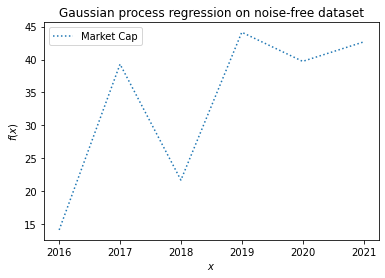

In [417]:

plt.plot(data[:,0], mean_prediction, label=r"Market Cap", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")